In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [3]:
A1 = np.array([[2.1213, 0.7071], [-2.1213, 0.7071]])
A2 = np.array([[3.5640, -0.4540], [1.8160, 0.8910]])

In [4]:
# f1 and f2
def grad_f1(xy):
    x, y = xy
    diff = np.array([x - 2 * y + 2, y - 2])
    return 2 * A1 @ diff

def grad_f2(xy):
    x, y = xy
    diff = np.array([x + 2.5 * y - 2.5, y + 2.5])
    return 2 * A2 @ diff

In [5]:
def grad_f(xy, lambd):
    return (1 - lambd) * grad_f1(xy) + lambd * grad_f2(xy)

In [6]:
# Pareto
def find_pareto_points():
    lambdas = np.linspace(0, 1, 50)
    pareto_points = []

    for lambd in lambdas:
        initial_guess = np.array([0.0, 0.0])
        solution = fsolve(lambda xy: grad_f(xy, lambd), initial_guess)
        pareto_points.append(solution)
    
    return np.array(pareto_points)

In [7]:
pareto_points = find_pareto_points()

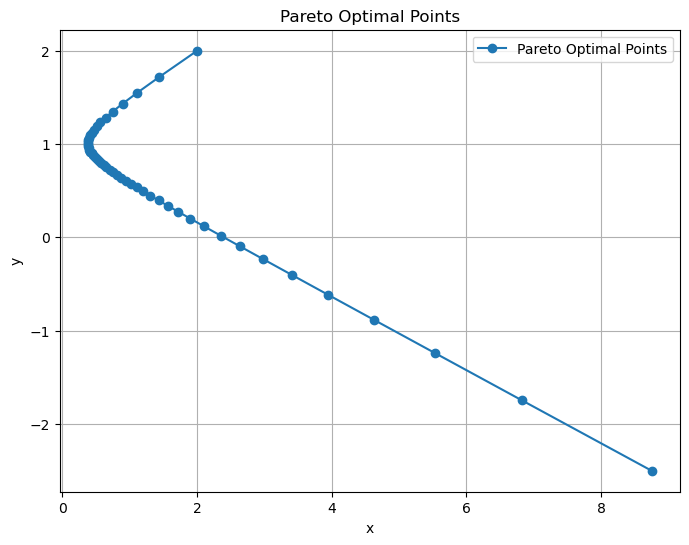

In [8]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'o-', label="Pareto Optimal Points")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pareto Optimal Points')
plt.legend()
plt.grid(True)
plt.show()